<a href="https://colab.research.google.com/github/Bhupendra171999/diabetes-detection-of-classification/blob/main/Diabetes_detection_of_classification__bhupendra.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#importing all library

In [ ]:
import warnings 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns


#read datafile

In [ ]:
data=pd.read_csv('/content/drive/MyDrive/diabetes.csv')

In [ ]:
data

,pregnancies,glucose,bloodpressure,skinthickness,insulin,bmi,diabetespedigreefunction,age,outcome
0,6,148,72,35,0,33.6,0.627,50,True
1,1,85,66,29,0,26.6,0.351,31,False
2,8,183,64,0,0,23.3,0.672,32,True
3,1,89,66,23,94,28.1,0.167,21,False
4,0,137,40,35,168,43.1,2.288,33,True
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,False
764,2,122,70,27,0,36.8,0.340,27,False
765,5,121,72,23,112,26.2,0.245,30,False
766,1,126,60,0,0,30.1,0.349,47,True


In [ ]:
data.head()

,pregnancies,glucose,bloodpressure,skinthickness,insulin,bmi,diabetespedigreefunction,age,outcome
0,6,148,72,35,0,33.6,0.627,50,True
1,1,85,66,29,0,26.6,0.351,31,False
2,8,183,64,0,0,23.3,0.672,32,True
3,1,89,66,23,94,28.1,0.167,21,False
4,0,137,40,35,168,43.1,2.288,33,True


#find the missing values

In [ ]:
data.isnull().sum()

pregnancies                 0
glucose                     0
bloodpressure               0
skinthickness               0
insulin                     0
bmi                         0
diabetespedigreefunction    0
age                         0
outcome                     0
dtype: int64

In [ ]:
data.columns

Index(['pregnancies', 'glucose', 'bloodpressure', 'skinthickness', 'insulin',
       'bmi', 'diabetespedigreefunction', 'age', 'outcome'],
      dtype='object')

#for changing the outcome datatype

In [ ]:
data.outcome = data.outcome.replace({True: 1, False: 0})
data.head()

,pregnancies,glucose,bloodpressure,skinthickness,insulin,bmi,diabetespedigreefunction,age,outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pregnancies               768 non-null    int64  
 1   glucose                   768 non-null    int64  
 2   bloodpressure             768 non-null    int64  
 3   skinthickness             768 non-null    int64  
 4   insulin                   768 non-null    int64  
 5   bmi                       768 non-null    float64
 6   diabetespedigreefunction  768 non-null    float64
 7   age                       768 non-null    int64  
 8   outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
cor_mat=data.corr()
cor_mat


,pregnancies,glucose,bloodpressure,skinthickness,insulin,bmi,diabetespedigreefunction,age,outcome
pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
bloodpressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
skinthickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
bmi,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
diabetespedigreefunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


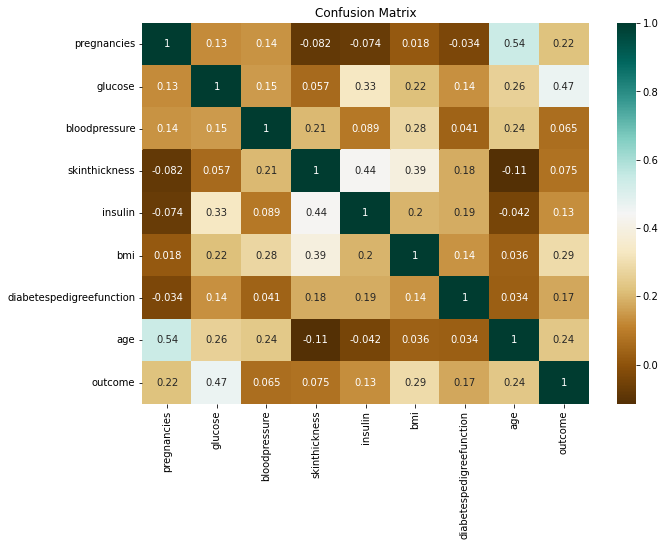

In [ ]:
plt.figure(figsize=(10,7))
plt.title('Confusion Matrix')
sns.heatmap(cor_mat,annot=True,cmap='BrBG')
plt.show()

In [ ]:
x = data.drop('outcome',axis=1)
y=data.iloc[:,-1]
print(x.head())
print(y.head())

   pregnancies  glucose  bloodpressure  skinthickness  insulin   bmi  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   diabetespedigreefunction  age  
0                     0.627   50  
1                     0.351   31  
2                     0.672   32  
3                     0.167   21  
4                     2.288   33  
0    1
1    0
2    1
3    0
4    1
Name: outcome, dtype: int64


In [ ]:
from sklearn.preprocessing import LabelEncoder 
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,plot_confusion_matrix,accuracy_score,confusion_matrix,log_loss

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit_transform(x)

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]])

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=123)

#Double-click (or enter) to edit

In [ ]:
print('Shape of {} is {}'.format("x_train",x_train.shape ))     
print('Shape of {} is {}'.format("x_test",x_test.shape))
print('Shape of {} is {}'.format("y_train",y_train.shape))
print('Shape of {} is {}'.format("y_test",y_test.shape))

Shape of x_train is (614, 8)
Shape of x_test is (154, 8)
Shape of y_train is (614,)
Shape of y_test is (154,)


In [ ]:
lg = LogisticRegression()
lg.fit(x_train,y_train)

LogisticRegression()

In [ ]:
y_pred = lg.predict(x_test)
y_pred

array([1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0])

In [ ]:
print(accuracy_score(y_test,y_pred))

0.7922077922077922


#Decision Tree Classfier

In [ ]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_pred1 = dt.predict(x_test)
y_pred1

array([1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0])

In [ ]:
print(accuracy_score(y_test,y_pred1))

0.7857142857142857


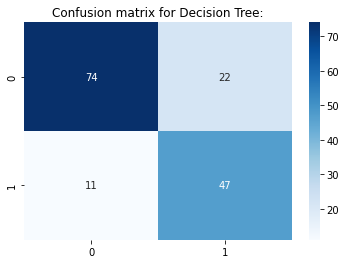

In [ ]:
cm2 = confusion_matrix(y_test,y_pred1)
sns.heatmap(cm2,annot=True,cmap='Blues')
plt.title('Confusion matrix for Decision Tree:')
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100)
rf.fit(x_train,y_train)
y_pred2=rf.predict(x_test)

In [ ]:
print(accuracy_score(y_test,y_pred2))

0.7662337662337663


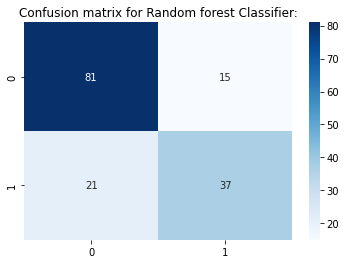

In [ ]:
cm3= confusion_matrix(y_test,y_pred2)
sns.heatmap(cm3,annot=True,cmap='Blues')
plt.title('Confusion matrix for Random forest Classifier:')
plt.show()

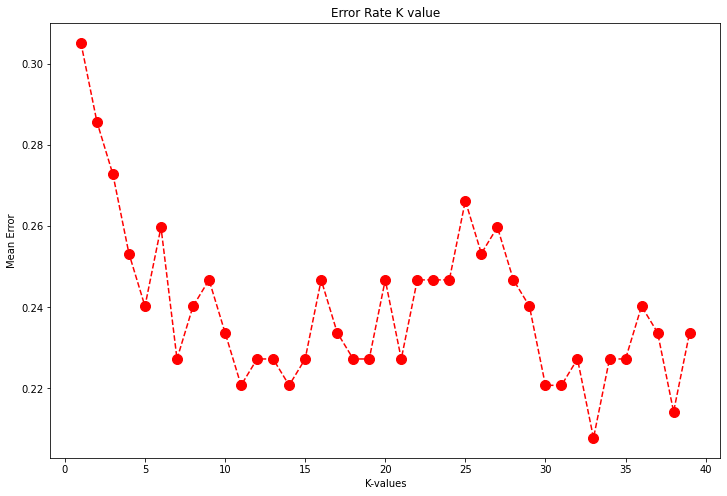

In [ ]:
error=[]
from sklearn.neighbors import KNeighborsClassifier
for i in range(1,40):
  model=KNeighborsClassifier(n_neighbors=i)
  model.fit(x_train,y_train)
  pred_i=model.predict(x_test)
  error.append(np.mean(pred_i !=y_test))

plt.figure(figsize=(12,8))
plt.plot(range(1,40),error,color='Red',linestyle="dashed",marker="o",markersize=10)
plt.title("Error Rate K value")  
plt.xlabel("K-values")
plt.ylabel("Mean Error")
plt.show()

In [ ]:
model=KNeighborsClassifier(n_neighbors=15,metric='minkowski',p=2)
model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=15)

#predicting,wheather patient have diabetes not

In [ ]:
y_pred=model.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score
print("Accuracy of the model:{0}%".format(accuracy_score(y_test,y_pred)*100))

Accuracy of the model:77.27272727272727%


In [ ]:
pregnancies=int(input("Enter the new patient's pregnancies value:"))
Glucose=int(input("Enter the new patient's Glucose value:"))
bloodpressure=int(input("Enter the new patient's BloodPressure value:"))
skinthikness=int(input("Enter the new patient's skinthikness value:"))
Insulin=int(input("Enter the new patient insulin value:"))
BMI=float(input("Enter the new patient's pedigree value:"))
pedigree=float(input("Enter the new patients Predigree value:"))
age=int(input("Enter the new patients age value:"))
new_patient=[['pregnancies', 'glucose', 'bloodpressure', 'skinthickness', 'insulin',
       'BMI', 'diabetespedigreefunction', 'age']]


result=model.predict(sc.transform(new_patient))
print(result)



if result == 0:
  print("Patient is Diabetic")
else:
  print("Patient is not Diabetic")
